In [1]:
import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise, NormalActionNoise
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

In [3]:
def visualize_model(model):
    scouter_array = np.array([[i, j] for i in np.arange(0,1,0.01) for j in np.arange(0,1,0.0177)])
    decisions = []
    for array in scouter_array:
        action, _ = model.predict(array)
        decisions.append(action)
    scouter = pd.DataFrame(scouter_array * 100, columns=['x','y'])
    scouter[['action','r','a']] = decisions

    draw.pitch()
    scouter_shots = scouter[scouter.action < 0.5]
    scouter_passes = scouter[scouter.action >= 0.5]
    plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
    for i, row in scouter_passes.iterrows():
        if i%6 == 0:
            plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')

In [4]:
df = pd.read_csv('saved_models/results.txt')
df[['__dis1', 'model', '__dis2', '__dis3', '__dis4', 'type', 'iteration']] = df['run'].str.split('_', expand=True)
df = df[['run', 'model', 'type', 'iteration', 'result']]
df.model = df.model.str.replace('models/','')
df

,run,model,type,iteration,result
0,saved_models/a2c_soccer_actions_env_1_0,a2c,1,0,0.014812
1,saved_models/a2c_soccer_actions_env_1_1,a2c,1,1,0.016396
2,saved_models/a2c_soccer_actions_env_1_2,a2c,1,2,0.015627
3,saved_models/a2c_soccer_actions_env_1_3,a2c,1,3,0.015775
4,saved_models/a2c_soccer_actions_env_1_4,a2c,1,4,0.014989
...,...,...,...,...,...
165,saved_models/td3_soccer_actions_env_2_5,td3,2,5,0.014053
166,saved_models/td3_soccer_actions_env_2_6,td3,2,6,0.019213
167,saved_models/td3_soccer_actions_env_2_7,td3,2,7,0.012978
168,saved_models/td3_soccer_actions_env_2_8,td3,2,8,0.013830


In [5]:
grouped_df = df.groupby(['model','type']).mean()
grouped_df['std'] = df.groupby(['model','type']).std()['result']
grouped_df['max'] = df.groupby(['model','type']).max()['result']
grouped_df['min'] = df.groupby(['model','type']).min()['result']
grouped_df

result       std       max       min
model type                                        
a2c   1     0.015912  0.000530  0.016871  0.014812
ddpg  1     0.011912  0.009063  0.031746  0.000000
      2     0.013359  0.009469  0.029615  0.000005
      3     0.007535  0.007920  0.028317  0.000000
ppo   1     0.013760  0.000575  0.014372  0.012386
sac   1     0.013962  0.000367  0.014558  0.013296
td3   1     0.014132  0.002116  0.016915  0.010022
      2     0.013704  0.003067  0.019213  0.008274

In [6]:
df.sort_values('result').iloc[-5:]

,run,model,type,iteration,result
23,saved_models/ddpg_soccer_actions_env_1_3,ddpg,1,3,0.026213
49,saved_models/ddpg_soccer_actions_env_3_9,ddpg,3,9,0.028317
38,saved_models/ddpg_soccer_actions_env_2_8,ddpg,2,8,0.029615
20,saved_models/ddpg_soccer_actions_env_1_0,ddpg,1,0,0.030336
108,saved_models/ddpg_soccer_actions_env_1_8,ddpg,1,8,0.031746


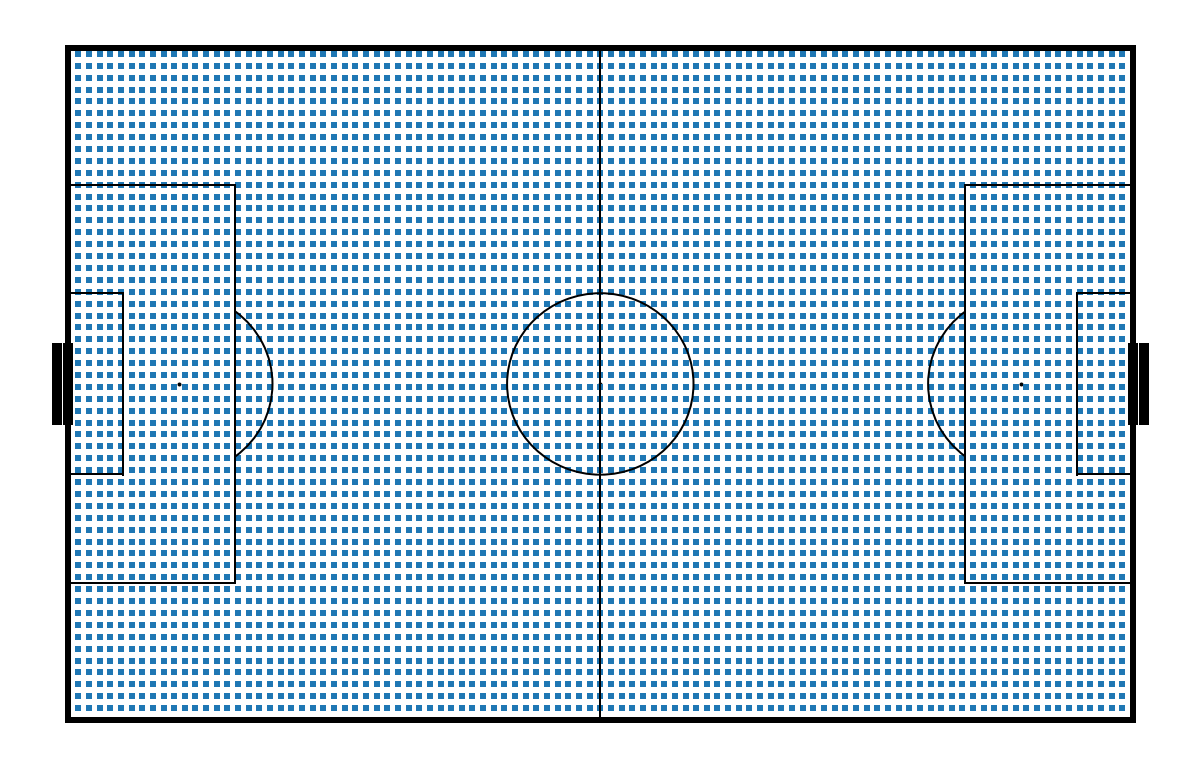

In [7]:
model = A2C.load('saved_models/a2c_soccer_actions_env_1_0')
visualize_model(model);

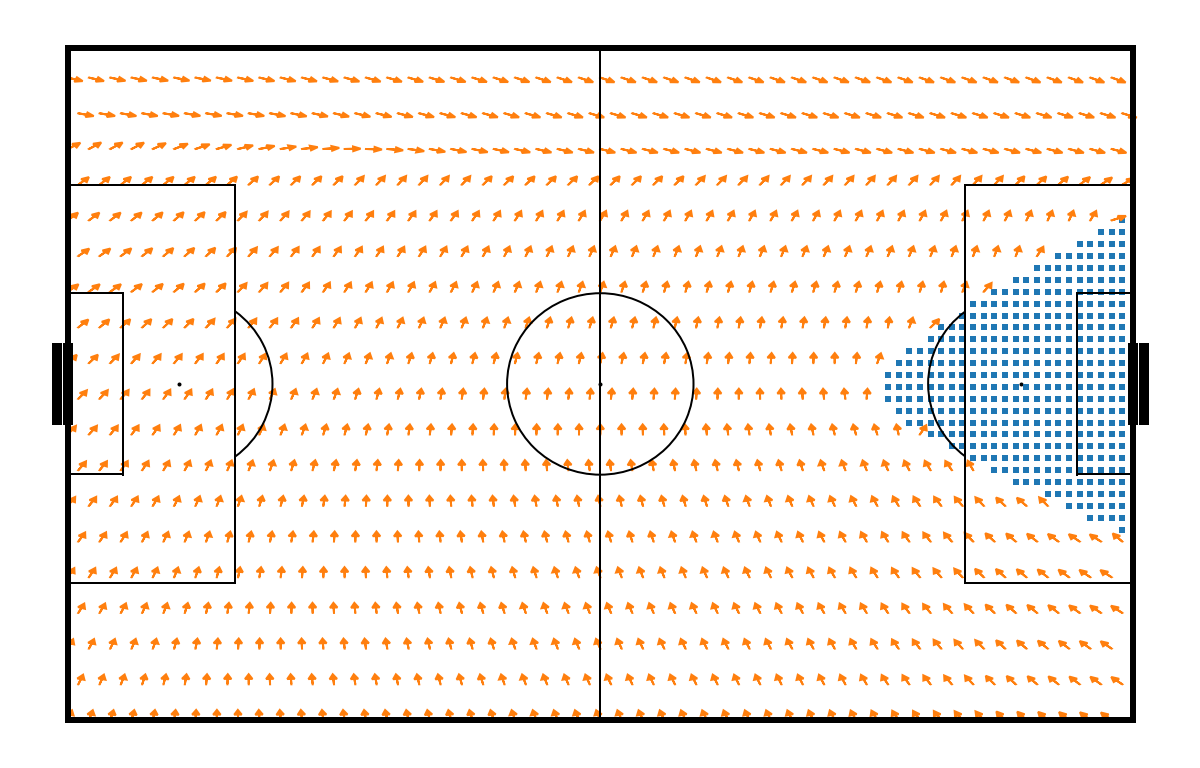

In [11]:
model = DDPG.load('saved_models/ddpg_soccer_actions_env_1_8')
visualize_model(model);

ipykernel_launcher:16: RuntimeWarning: invalid value encountered in double_scalars


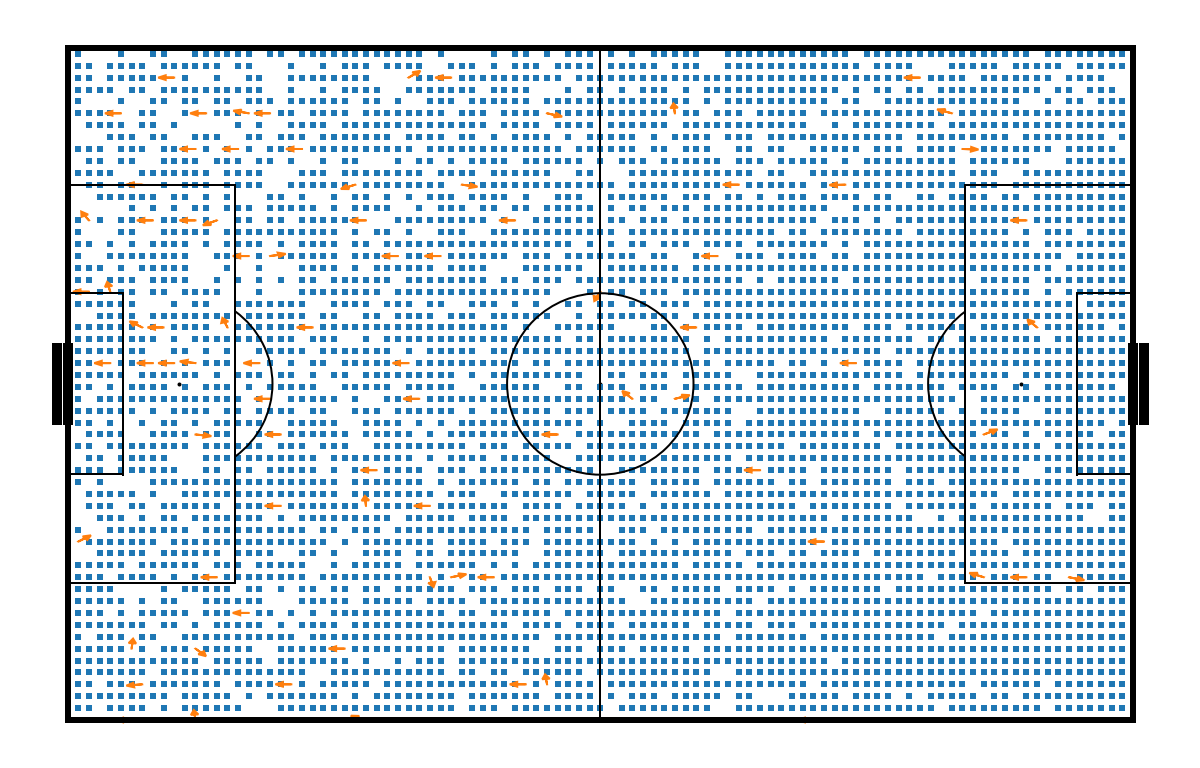

In [9]:
model = PPO.load('saved_models/ppo_soccer_actions_env_1_0')
visualize_model(model);

In [10]:
model = SAC.load('saved_models/sac_soccer_actions_env_1_0')
visualize_model(model);

AttributeError: 'ActorCriticPolicy' object has no attribute 'actor'

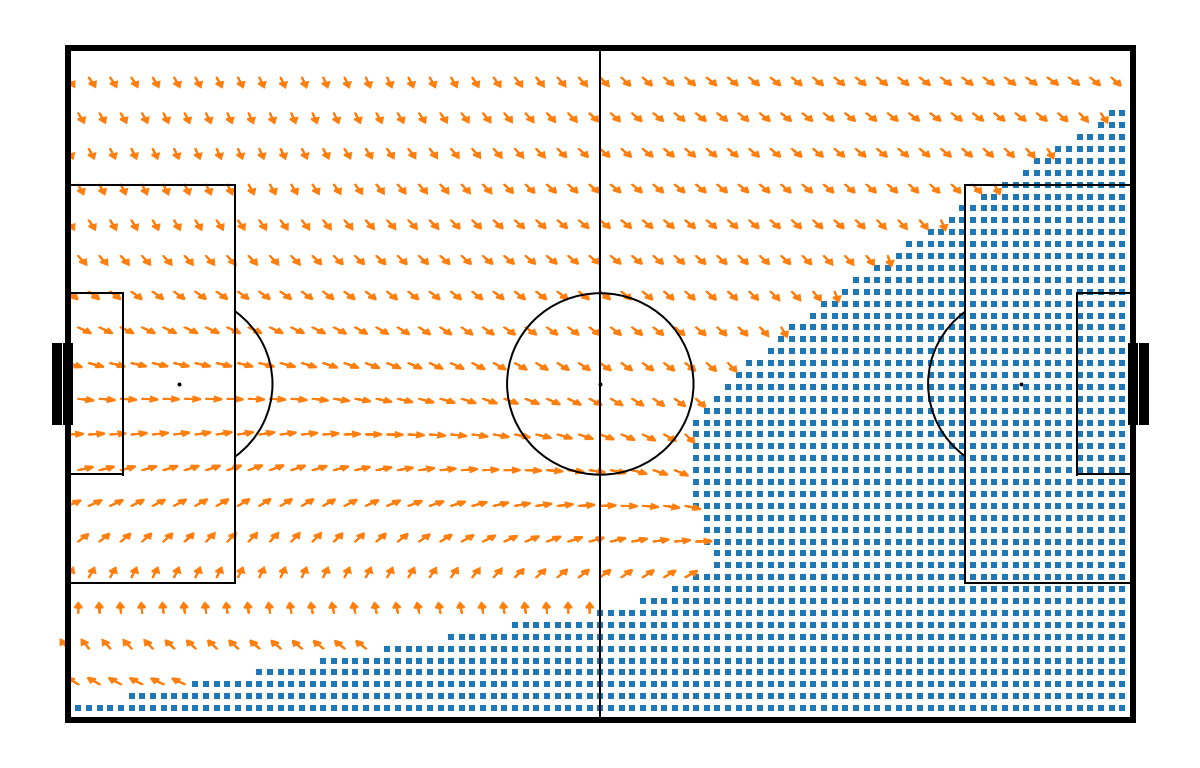

In [12]:
model = TD3.load('saved_models/td3_soccer_actions_env_1_0')
visualize_model(model);